In [9]:
import numpy as np  
from keras.models import Sequential
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
np.shape(x_train)

(60000, 28, 28)

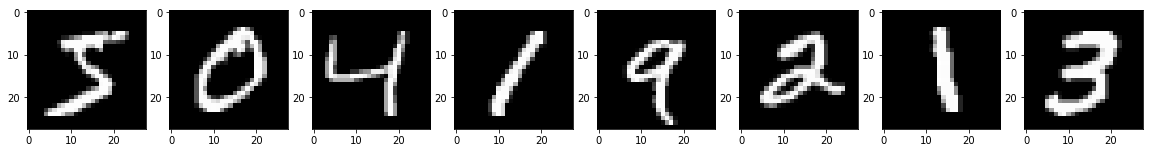

In [11]:
from matplotlib import pyplot as plt

columns = 8
fig = plt.figure(figsize=(20,10))
for i in range(1, columns + 1):
    fig.add_subplot(1, columns, i)
    plt.imshow(x_train[i-1])
plt.gray()

In [15]:
x_train_1D = x_train.reshape(60000, 28*28)
print np.shape(x_train_1D)

x_train_norm = x_train_1D.astype('float32')
x_train_norm = x_train_norm/255

(60000, 784)


In [16]:
print np.shape(y_train)
print y_train[0:10]

(60000,)
[5 0 4 1 9 2 1 3 1 4]


### [One-hot encoding](https://en.wikipedia.org/wiki/One-hot)
![](https://drive.google.com/uc?id=1C4-g8Rus_DJ6cxN1NXf5HFrEUNu2oHtL)

In [17]:
from keras.utils import np_utils
y_train_onehot = np_utils.to_categorical(y_train) 
y_train_onehot[:3]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [20]:
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=100, input_shape=(28*28,), activation='sigmoid', name='layer_1'))
model.add(Dense(units=10, activation='softmax', name='layer_2'))
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
print model.summary()

train_history = model.fit(x=x_train_norm, y=y_train_onehot, batch_size=100, epochs=10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
layer_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
60000/60000 [==============================] - 3s 50us/step - loss: 1.9526 - acc: 0.5529
Epoch 2/10
60000/60000 [==============================] - 3s 47us/step - loss: 1.3991 - acc: 0.7419
Epoch 3/10
60000/60000 [==============================] - 3s 47us/step - loss: 1.0514 - acc: 0.7997
Epoch 4/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.8488 - acc: 0.8298
Epoch 5/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.7255 - acc: 0.8455
Epoch 6/10
60000/60000 [=====

![](https://drive.google.com/uc?id=1Pyd1JZA-HdG0n2J9_TxFuGx7xxAuXK7O)
[source - Introduction of Deep Learning, p21, 李宏毅](http://speech.ee.ntu.edu.tw/~tlkagk/courses/ML_2017/Lecture/DL.pdf)

* activation - [softmax](https://www.youtube.com/watch?v=hSXFuypLukA&feature=youtu.be&list=PLJV_el3uVTsPy9oCRY30oBPNLCo89yu49&t=3005)
* loss - [cross_entropy](https://www.youtube.com/watch?v=tRsSi_sqXjI&feature=youtu.be&t=36) ([categorical_crossentropy in keras
](https://keras.io/losses/#categorical_crossentropy))

### Softmax
![](https://drive.google.com/uc?id=1OJ0JS7lVdR9YhiyY-DA79AIzvYsxKtvc)
[source - Classification Logistic Regression, 24, 李宏毅][1]
[1]:http://speech.ee.ntu.edu.tw/~tlkagk/courses/ML_2017/Lecture/Logistic%20Regression%20(v4).pdf
### Cross entroy vs Square error
![](https://drive.google.com/uc?id=1ZMRRk_7MRY9m2Xe-gEhqEIG19c0zVKFk)
[source - Classification: Logistic Regression, p14, 李宏毅][2]
[2]:http://speech.ee.ntu.edu.tw/~tlkagk/courses/ML_2017/Lecture/Logistic%20Regression%20(v4).pdf

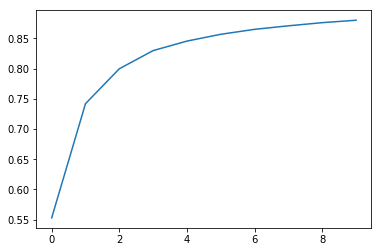

In [21]:
from matplotlib import pyplot as plt
plt.plot(train_history.history['acc'])
plt.show()

# Test

In [22]:
np.shape(x_test)

(10000, 28, 28)

In [29]:
x_test_1D = x_test.reshape(10000, 28*28)
x_test_1D = x_test_1D.astype('float32')
x_test_norm = x_test_1D/255

In [30]:
y_test_onehot = np_utils.to_categorical(y_test) 

In [31]:
model.evaluate(x=x_test_norm, y=y_test_onehot)

10000/10000 [==============================] - 0s 42us/step


[0.45268419818878175, 0.88949999999999996]

In [35]:
y_pred = model.predict(x_test_1D)
print y_pred.shape
print y_pred[0]

(10000, 10)
[  4.66634901e-06   4.20515249e-07   7.07649588e-06   3.72249742e-05
   2.78404832e-06   2.27642772e-06   4.97285768e-08   9.99722064e-01
   1.27509952e-06   2.22194969e-04]


In [39]:
y_pred = model.predict_classes(x_test_1D)

## classification report

In [40]:
from sklearn.metrics import classification_report

target_names = [ "Class {}".format(i) for i in range(np.max(y_test) + 1) ]
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.87      0.98      0.92       980
    Class 1       0.95      0.96      0.95      1135
    Class 2       0.90      0.84      0.87      1032
    Class 3       0.84      0.90      0.87      1010
    Class 4       0.85      0.92      0.88       982
    Class 5       0.94      0.63      0.75       892
    Class 6       0.89      0.92      0.91       958
    Class 7       0.93      0.85      0.89      1028
    Class 8       0.76      0.88      0.82       974
    Class 9       0.86      0.84      0.85      1009

avg / total       0.88      0.88      0.87     10000



## confusion matrix

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 957,    0,    3,    3,    0,    0,    8,    1,    8,    0],
       [   0, 1084,   11,    5,    1,    1,    4,    0,   29,    0],
       [  22,    8,  869,   18,   23,    0,   29,   18,   43,    2],
       [   8,    1,   18,  913,    2,   15,    4,   11,   28,   10],
       [   4,    2,    2,    0,  899,    0,   17,    1,   19,   38],
       [  42,   10,    6,  101,   20,  561,   28,    9,  104,   11],
       [  31,    2,    7,    2,   15,    9,  884,    0,    8,    0],
       [   7,   26,   27,    2,   17,    0,    0,  877,   12,   60],
       [  13,    6,    8,   27,    9,   11,   17,    6,  860,   17],
       [  18,    7,   11,   12,   69,    2,    0,   17,   25,  848]])